In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the CSV file into a pandas dataframe. (1 pt)
bike_df = pd.read_csv("../data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv")
bike_df.head(5)

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,03/31/2019 11:00:00 PM,6.0,10.0
1,03/31/2019 10:00:00 PM,7.0,14.0
2,03/31/2019 09:00:00 PM,18.0,15.0
3,03/31/2019 08:00:00 PM,26.0,31.0
4,03/31/2019 07:00:00 PM,30.0,58.0


In [3]:
#Add columns to the dataframe containing: ( 3 pt)
#The total (East + West) bicycle count
bike_df['TotalEastWest']= bike_df['Fremont Bridge East Sidewalk'] + bike_df['Fremont Bridge West Sidewalk']

bike_df['Date'] = pd.to_datetime(bike_df['Date'])

#The hour of the day
bike_df['HourOfDay']= pd.DatetimeIndex(bike_df['Date']).hour

#The year
bike_df['Year']= pd.DatetimeIndex(bike_df['Date']).year

bike_df.head(5)

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,TotalEastWest,HourOfDay,Year
0,2019-03-31 23:00:00,6.0,10.0,16.0,23,2019
1,2019-03-31 22:00:00,7.0,14.0,21.0,22,2019
2,2019-03-31 21:00:00,18.0,15.0,33.0,21,2019
3,2019-03-31 20:00:00,26.0,31.0,57.0,20,2019
4,2019-03-31 19:00:00,30.0,58.0,88.0,19,2019


In [4]:
#Create a dataframe with the subset of data from the year 2016 (1 pt)
bike_2016_df = bike_df[bike_df['Year'] == 2016]
bike_2016_df.head(5)

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,TotalEastWest,HourOfDay,Year
19680,2016-12-31 23:00:00,4.0,4.0,8.0,23,2016
19681,2016-12-31 22:00:00,7.0,8.0,15.0,22,2016
19682,2016-12-31 21:00:00,4.0,6.0,10.0,21,2016
19683,2016-12-31 20:00:00,3.0,6.0,9.0,20,2016
19684,2016-12-31 19:00:00,6.0,4.0,10.0,19,2016


Text(0.5,1,'Total Daily Count vs Hour of Day')

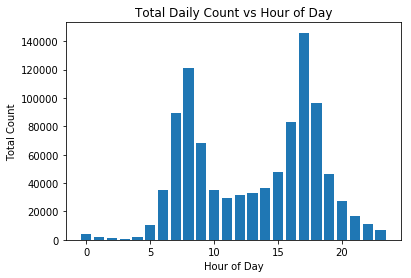

In [5]:
#Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis) (1 pt)

hourSums = bike_2016_df.groupby(['HourOfDay']).sum()

plt.bar(hourSums.index, hourSums['TotalEastWest'])
plt.xlabel('Hour of Day')
plt.ylabel('Total Count')
plt.title('Total Daily Count vs Hour of Day')

In [6]:
#Use pandas to determine what is (on average) the busiest hour of the day (1 pt)
hourMeans = bike_2016_df.groupby(['HourOfDay'])['TotalEastWest'].mean()
busiestHour = hourMeans.idxmax(axis=1)
print("The busiest hour of the day is: " + str(busiestHour))

The busiest hour of the day is: 17
